In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import rasterio

In [4]:
#loading vecor data
path=r'Shape_Data/local_unit.shp'
df=gpd.read_file(path)
df.head(5)

STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...

<Axes: >

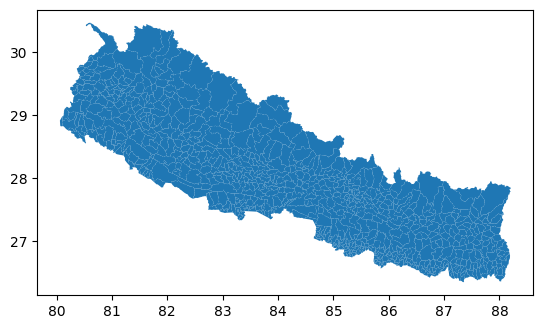

In [5]:
df.plot()

In [6]:
df.describe

<bound method NDFrame.describe of      STATE_CODE       DISTRICT                  GaPa_NaPa          Type_GN  \
0             1      TAPLEJUNG            Aathrai Tribeni       Gaunpalika   
1             1      TAPLEJUNG                 Maiwakhola       Gaunpalika   
2             1      TAPLEJUNG                  Meringden       Gaunpalika   
3             1      TAPLEJUNG                 Mikwakhola       Gaunpalika   
4             1      TAPLEJUNG               Phaktanglung       Gaunpalika   
..          ...            ...                        ...              ...   
772           4  NAWALPARASI_E     Chitawan National Park    National Park   
773           5        RUKUM_E                      Bhume       Gaunpalika   
774           5        RUKUM_E           Putha Uttarganga       Gaunpalika   
775           5        RUKUM_E                      Sisne       Gaunpalika   
776           5        RUKUM_E  Dhorpatan Hunting Reserve  Hunting Reserve   

    Province                 

In [7]:
#Coordinate referencing system
df.crs

<Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
Name: NepalDD
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Everest_Bangladesh
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [8]:
df.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
772    Polygon
773    Polygon
774    Polygon
775    Polygon
776    Polygon
Length: 777, dtype: object

In [9]:
climate_raster_paths = {
    'temperature_2020': r"nepal_climate_data/nepal_temperature_2020.tif",
    'temperature_2050': r"nepal_climate_data/nepal_temperature_2050.tif",
    'precipitation_2020': r"nepal_climate_data/nepal_precipitation_2020.tif",
    'precipitation_2050': r"nepal_climate_data/nepal_precipitation_2050.tif"
}


In [ ]:
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        raster_values=src.read(1)
        bounds=[src.bounds[0],src.bounds[2],src.bounds[1],src.bounds[3]] #bounding box (extent) means maximum and minimum x/y coordinates
    return raster_values,bounds

In [ ]:
#Read data
temp_data={}
ppt_data={}
for key,path in climate_raster_paths.items():
    data,extent=read_raster(path) #read raster data and bounding box
    if 'temperature' in key :
        temp_data[key]=data
    else:
        ppt_data[key]=data

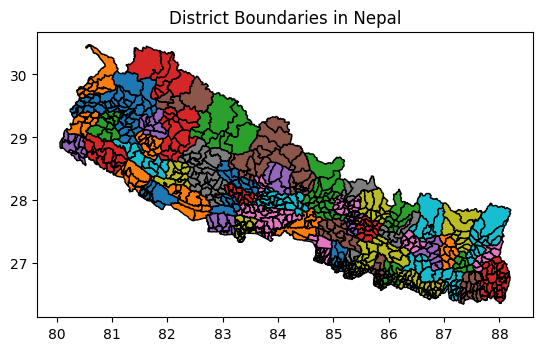

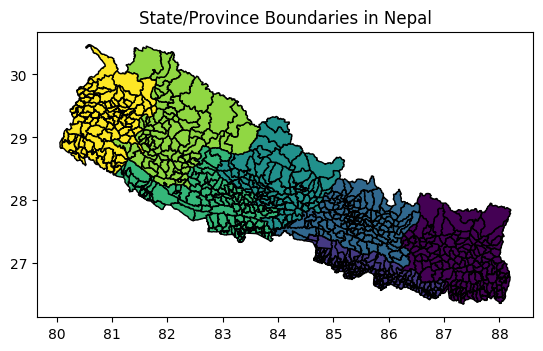

In [12]:
#plot vector data
def plot_vector_data(gdf,column,title):
    gdf.plot(column=column,edgecolor='black')
    plt.title(title)
    plt.show()
plot_vector_data(df,'DISTRICT','District Boundaries in Nepal')
plot_vector_data(df,'STATE_CODE','State/Province Boundaries in Nepal')

In [ ]:
#Overlay vector data on top of raster image
def overlay_raster_vector(raster,extent,gdf,column,title):
    fig,ax=plt.subplots(figsize=(10,10))
    ax.imshow(raster,cmap='viridis',extent=extent)
    gdf.plot(ax=ax,column=column,facecolor='none',edgecolor='black')
    plt.title(title)
    plt.show()

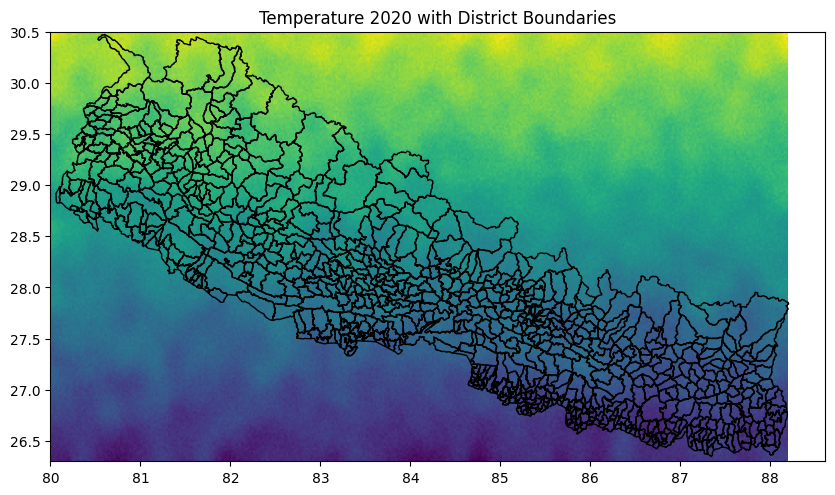

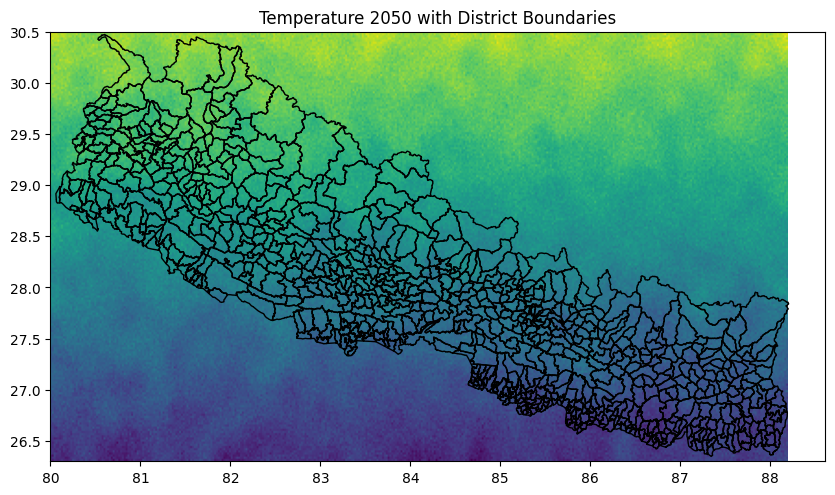

In [14]:
for year in ['2020','2050']:
    overlay_raster_vector(temp_data[f'temperature_{year}'],extent,df,'DISTRICT',f'Temperature {year} with District Boundaries')

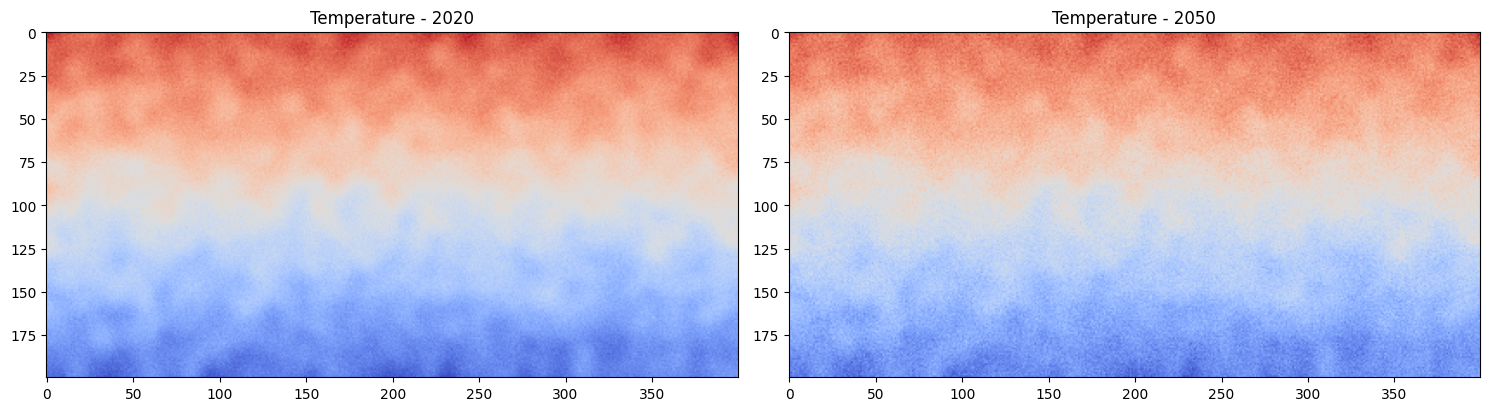

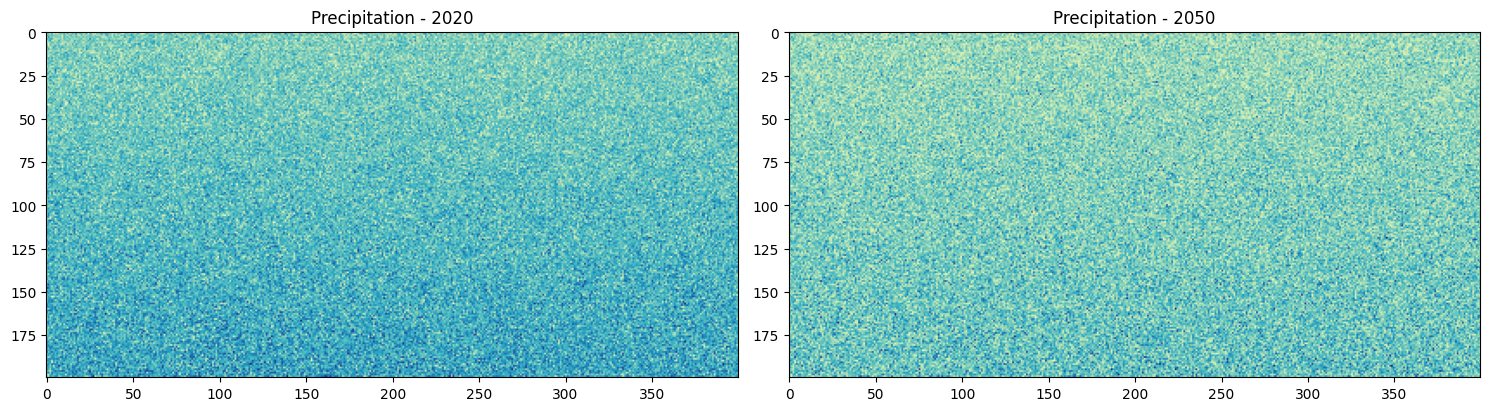

In [15]:
#Climate Trend Visualization
def plot_trends_over_time(data_dict,title,cmap):
    fig,axes=plt.subplots(1,len(data_dict),figsize=(15,5))
    for i ,(year,data) in enumerate(data_dict.items()):
        ax=axes[i]
        ax.imshow(data,cmap=cmap)
        ax.set_title(f'{title} - {year[-4:]}')
    plt.tight_layout()
    plt.show()
plot_trends_over_time(temp_data,'Temperature','coolwarm')
plot_trends_over_time(ppt_data,'Precipitation','YlGnBu')

In [16]:
#Compute statistics
def calculate_statistics(data):
    return{
        'Mean':np.mean(data),
        'Median':np.median(data),
        'Min':np.min(data),
        'Max':np.max(data)
    }

In [17]:
temp_stats = {year: calculate_statistics(temp) for year, temp in temp_data.items()}
precip_stats = {year: calculate_statistics(precip) for year, precip in ppt_data.items()}

print('Temperature Statistics:', temp_stats) 
print('Precipitation Statistics:', precip_stats)

Temperature Statistics: {'temperature_2020': {'Mean': np.float64(-7.577415755765925), 'Median': np.float64(-7.685702505675591), 'Min': np.float64(-23.198749681712457), 'Max': np.float64(8.138670708338557)}, 'temperature_2050': {'Mean': np.float64(-5.472906912267607), 'Median': np.float64(-5.578674327456623), 'Min': np.float64(-22.08736312988644), 'Max': np.float64(11.473132313566794)}}
Precipitation Statistics: {'precipitation_2020': {'Mean': np.float64(50.83796524449648), 'Median': np.float64(50.36654491061009), 'Min': np.float64(6.8563433623171495), 'Max': np.float64(102.83267376645965)}, 'precipitation_2050': {'Mean': np.float64(48.285593218473295), 'Median': np.float64(46.74243795125839), 'Min': np.float64(-6.410086048906941), 'Max': np.float64(134.9692970311526)}}


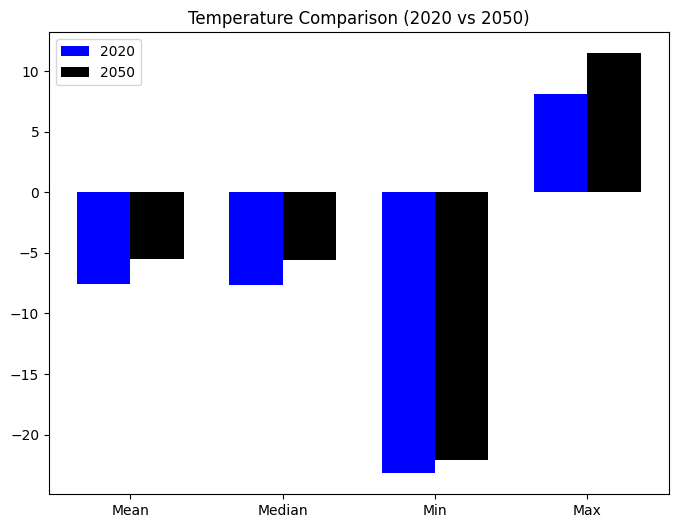

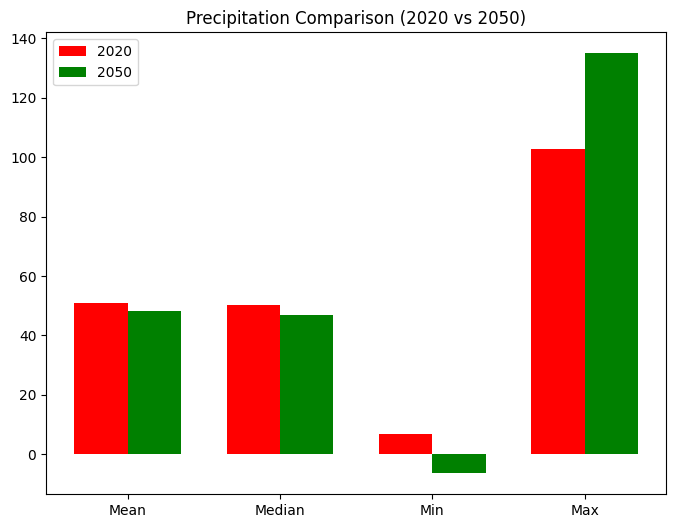

In [18]:
#Bar Graph plotting
def plot_comparison_chart(title,stats_2020,stats_2050,color_2020,color_2050):
    labels=['Mean','Median','Min','Max']
    x=np.arange(len(labels))
    width=0.35
    fig,ax=plt.subplots(figsize=(8,6))
    ax.bar(x-width/2,stats_2020.values(),width,label='2020',color=color_2020)
    ax.bar(x+width/2,stats_2050.values(),width,label='2050',color=color_2050)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_title(f'{title} Comparison (2020 vs 2050)')
    ax.legend()
    plt.show()
plot_comparison_chart('Temperature',temp_stats['temperature_2020'],temp_stats['temperature_2050'],'blue','black')
plot_comparison_chart('Precipitation',precip_stats['precipitation_2020'],precip_stats['precipitation_2050'],'red','green')

In [19]:
#Line graph for trends
years=[2020,2050]
temp_mean_values=[temp_stats['temperature_2020']['Mean'],temp_stats['temperature_2050']['Mean']]
precip_mean_values=[precip_stats['precipitation_2020']['Mean'],precip_stats['precipitation_2050']['Mean']]

interpolated_years=np.arange(2020,2051)
temp_interpolated=np.interp(interpolated_years,years,temp_mean_values)
precip_interpolated=np.interp(interpolated_years,years,precip_mean_values)

trend_df=pd.DataFrame({
    'Year':interpolated_years,
    'Temperature (C)':temp_interpolated,
    'Precipitation (mm)':precip_interpolated
})

In [30]:
trend_df

Year  Temperature (C)  Precipitation (mm)
0   2020        -7.577416           50.837965
1   2021        -7.507265           50.752886
2   2022        -7.437115           50.667807
3   2023        -7.366965           50.582728
4   2024        -7.296815           50.497649
5   2025        -7.226664           50.412570
6   2026        -7.156514           50.327491
7   2027        -7.086364           50.242412
8   2028        -7.016213           50.157333
9   2029        -6.946063           50.072254
10  2030        -6.875913           49.987175
11  2031        -6.805763           49.902096
12  2032        -6.735612           49.817016
13  2033        -6.665462           49.731937
14  2034        -6.595312           49.646858
15  2035        -6.525161           49.561779
16  2036        -6.455011           49.476700
17  2037        -6.384861           49.391621
18  2038        -6.314710           49.306542
19  2039        -6.244560           49.221463
20  2040        -6.174410           49.136384
21  2041        -6.104260           49.051305
22  2042        -6.034109           48.966226
23  2043        -5.963959           48.881147
24  2044        -5.893809           48.796068
25  2045        -5.823658           48.710989
26  2046        -5.753508           48.625909
27  2047        -5.683358           48.540830
28  2048        -5.613208           48.455751
29  2049        -5.543057           48.370672
30  2050        -5.472907           48.285593

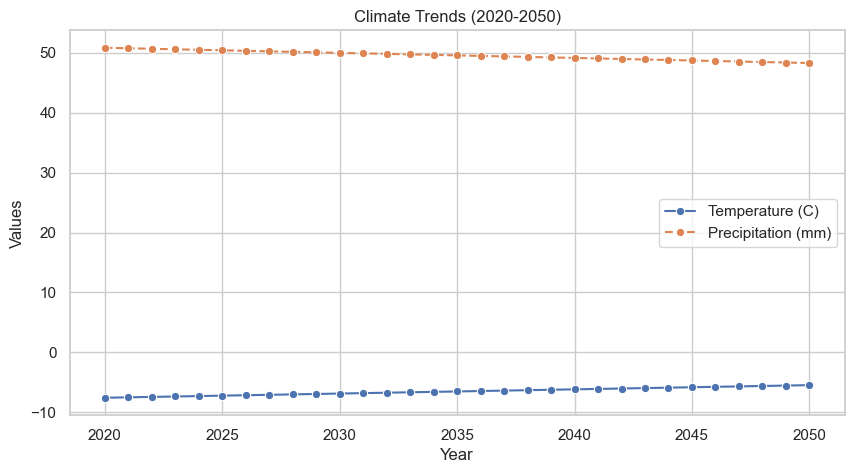

In [20]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df,x='Year',y='Temperature (C)',marker='o',label='Temperature (C)')
sns.lineplot(data=trend_df,x='Year',y='Precipitation (mm)',marker='o',label='Precipitation (mm)',linestyle='dashed')
plt.title('Climate Trends (2020-2050)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

# Conclusion
#### The above project we completed provides a lot of useful insights for climate change stakeholders and policy makers.We have done a lot of visualizations and analysis about temperature and precipitation parameters. From our study and analysis, we can conclude that the temperature has increasing trend and precipitation has decreasing trend.The mean temperature of 2020 is -7.57 which will be increased to -5.47 in 2050. Similarly the mean precipitation is 50.8 in 2020 which will be decreased to 48.2 in 2050 AD.Our analysis shows some concerning information about the climate change and global warming in near future. Further enhancement could provide more useful insights on this topic.This project underlines the significance of data-driven decision making in the realm of climate change.